### Import Packages

In [2]:
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

### Define the model

In [3]:
model = GaussianProcessRegressor()

In [4]:
def objective(x):
    y=(x**2 * sin(5 * pi * x)**6.0)
    return y

def surrogate(model,X):
    sur=model.predict(X,return_std=True)
    return sur

def acquisition(X,Xsamples,model):
    yhat,_=surrogate(model,X)
    best=max(yhat)
    mu,std=surrogate(model,Xsamples)
    mu=mu[:,0]
    probs=norm.cdf((mu-best)/std+1E-9)
    return probs
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xsamples = random(100)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = argmax(scores)
    return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples)
    # show the plot
    pyplot.show()


### Randomly Generate Datapoints

In [5]:
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

### Gaussian Model

In [6]:
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
sur=model.predict(X)

### Plot

In [78]:
ix = argmax(scores)
ix

918

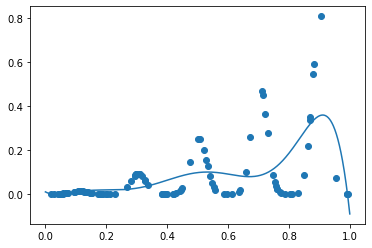

In [76]:
pyplot.scatter(X,y)
Xsamples = asarray(arange(0, 1, 0.001))
Xsamples = Xsamples.reshape(len(Xsamples), 1)
ysamples = model.predict(Xsamples)
pyplot.plot(Xsamples,ysamples)

>x=0.907, f()=0.357456, actual=0.792
>x=0.638, f()=0.080777, actual=0.012
>x=0.801, f()=0.186877, actual=0.000
>x=0.939, f()=0.324273, actual=0.258
>x=0.498, f()=0.095590, actual=0.247
>x=0.912, f()=0.357637, actual=0.750
>x=0.993, f()=-0.024337, actual=0.000
>x=0.348, f()=0.039524, actual=0.018
>x=0.732, f()=0.098032, actual=0.248
>x=0.481, f()=0.092136, actual=0.178
>x=0.037, f()=-0.003720, actual=0.000
>x=0.831, f()=0.245151, actual=0.008
>x=0.123, f()=0.011847, actual=0.010
>x=0.015, f()=-0.000104, actual=0.000
>x=0.912, f()=0.357650, actual=0.752
>x=0.058, f()=-0.001747, actual=0.001
>x=0.406, f()=0.064290, actual=0.000
>x=0.912, f()=0.357621, actual=0.749
>x=0.910, f()=0.357719, actual=0.765
>x=0.139, f()=0.014043, actual=0.006
>x=0.663, f()=0.077629, actual=0.148
>x=0.707, f()=0.084124, actual=0.483
>x=0.911, f()=0.357670, actual=0.754
>x=0.911, f()=0.357696, actual=0.758
>x=0.912, f()=0.357622, actual=0.749
>x=0.723, f()=0.091955, actual=0.356
>x=0.695, f()=0.080510, actual=0.4

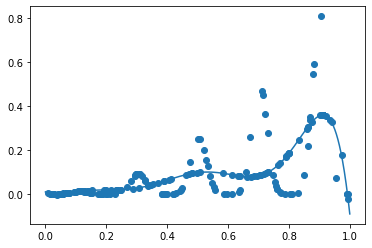

Best Result: x=0.904, y=0.807


In [77]:
for i in range(100):
    x = opt_acquisition(X, y, model)
    # sample the point
    actual = objective(x)
    actual
    est, _ = surrogate(model, [[x]])
    print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    # add the data to the dataset
    X = vstack((X, [[x]]))
    y = vstack((y, est))
    # update the model
    model.fit(X, y)
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))